In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [2]:
data = pd.read_csv("r.csv")
print(data)


    age  average length cycle
0    42                    29
1    42                    31
2    42                    30
3    42                    30
4    42                    29
5    42                    30
6    42                    31
7    42                    32
8    42                    29
9    42                    30
10   42                    30
11   42                    31
12   42                    30
13   42                    29
14   42                    29
15   42                    30
16   42                    30
17   42                    30
18   42                    30
19   42                    30
20   42                    31
21   42                    32
22   42                    30
23   42                    30
24   42                    29
25   42                    30
26   42                    29
27   42                    32
28   42                    29
29   42                    30
30   42                    30
31   42                    31
32   42   

In [3]:
data.head()


,age,average length cycle
0,42,29
1,42,31
2,42,30
3,42,30
4,42,29


In [4]:

data = data["average length cycle"]

In [5]:
#Make sure there are no null values
#sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
data.isnull().value_counts()

False    40
Name: average length cycle, dtype: int64

In [7]:
#Check the datatypes
print(data.dtypes)

int64


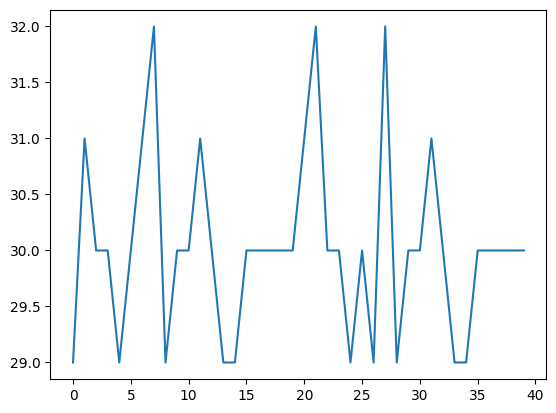

In [8]:
import matplotlib.pyplot as plt
plt.plot(data)

In [9]:
data.dtypes

dtype('int64')

In [10]:
data.head()

0    29
1    31
2    30
3    30
4    29
Name: average length cycle, dtype: int64

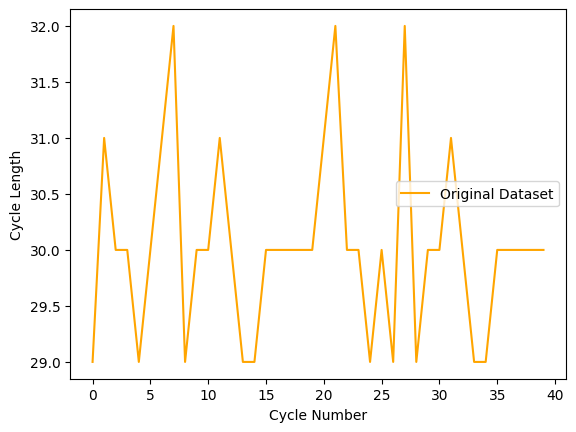

In [11]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [12]:
#Set the index of the Month 
#data.set_index('Timestamp',inplace=True)


In [13]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.11861298474791648, True)

<Axes: >

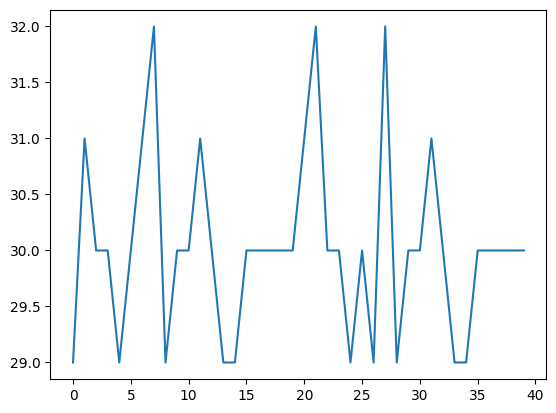

In [14]:
data.plot()

In [15]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    pvalue = result[1]
    if pvalue < 0.05:
        print("The data is stationary with p-value", pvalue)
    else:
        print("The data is not stationary with p-value", pvalue)
    
    return pvalue

# check for stationarity in the data
pvalue = check_stationarity(data)

# apply differencing to make the data stationary if necessary
if pvalue >= 0.05:
    differenced_data = data.diff().dropna()
    check_stationarity(differenced_data)
else:
    differenced_data = data




The data is stationary with p-value 1.460914245863876e-06


In [16]:
print(differenced_data)

0     29
1     31
2     30
3     30
4     29
5     30
6     31
7     32
8     29
9     30
10    30
11    31
12    30
13    29
14    29
15    30
16    30
17    30
18    30
19    30
20    31
21    32
22    30
23    30
24    29
25    30
26    29
27    32
28    29
29    30
30    30
31    31
32    30
33    29
34    29
35    30
36    30
37    30
38    30
39    30
Name: average length cycle, dtype: int64


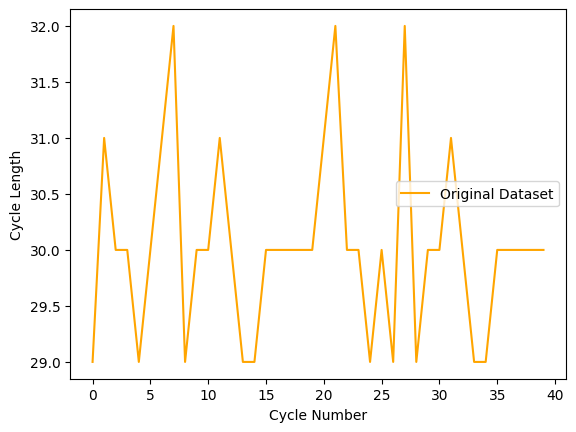

In [17]:
#plt.plot(a,label="Model Prediction",color='blue')
plt.plot(data,label="Original Dataset",color="orange")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Length")
plt.legend(loc="best")

In [18]:
# spilting the dataset
from sklearn.model_selection import train_test_split

X = differenced_data # dataset

train_size = 0.75
test_size = 1 - train_size
X_train, X_test = train_test_split(X, train_size=train_size, test_size=test_size, shuffle=False)


In [19]:
X_train.tail()

25    30
26    29
27    32
28    29
29    30
Name: average length cycle, dtype: int64

In [20]:
X_test.tail()

35    30
36    30
37    30
38    30
39    30
Name: average length cycle, dtype: int64

In [21]:
X_test.head()

30    30
31    31
32    30
33    29
34    29
Name: average length cycle, dtype: int64

Text(0, 0.5, 'CycleLength')

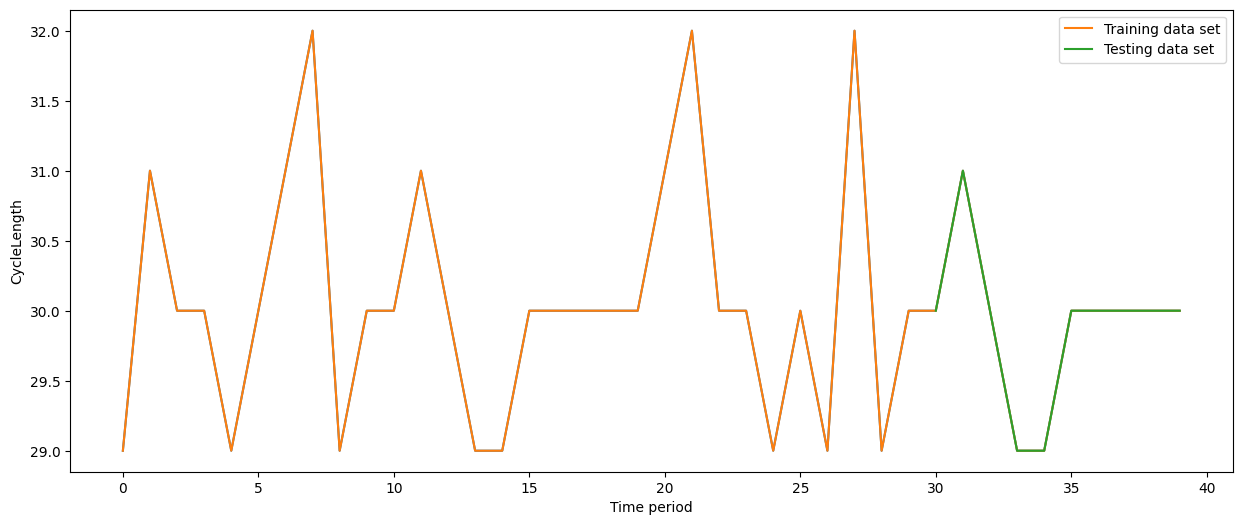

In [22]:
plt.figure(figsize=(15,6))
plt.plot(data)
plt.xlabel("Time period")
plt.ylabel("Average period cycle")
plt.plot(data,label="Training data set")
#plt.plot(range(len(X_train), len(X_train)+len(X_test)), X_test, color='orange', label='test')
plt.plot(X_test,label="Testing data set")
plt.xlabel('Time period')
plt.legend(loc = 'best')
plt.ylabel('CycleLength')



In [23]:
arima_model =  auto_arima(X_train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=0, max_q=10, start_P=0, 
                          D=1, start_Q=0, max_P=10, max_D=5,
                          max_Q=5, m=3, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=101.712, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=90.895, Time=0.02 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=99.729, Time=0.00 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=103.682, Time=0.01 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=85.539, Time=0.02 sec
 ARIMA(1,0,0)(3,1,0)[3] intercept   : AIC=86.014, Time=0.03 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=85.182, Time=0.03 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=84.251, Time=0.03 sec
 ARIMA(1,0,0)(0,1,1)[3] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,0,0)(1,1,2)[3] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,0,0)(0,1,2)[3] intercept   : AIC=81.830, Time=0.03 sec
 ARIMA(1,0,0)(0,1,3)[3] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(1,1,3)[3] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,2)[3] intercept   : AIC=79.831, Time=0.03 sec
 ARIMA(0,0

In [24]:
print(arima_model)

 ARIMA(0,0,0)(0,1,2)[3]          


In [48]:

prediction = pd.DataFrame(arima_model.predict(n_periods = 100),index=X_test.index)
prediction.columns = ['predicted_Cyclelength']
prediction

,predicted_Cyclelength
30,29.915382
31,29.908333
32,30.444171
33,30.841748
34,29.575277
35,29.884852
36,30.841748
37,29.575277
38,29.884852
39,30.841748


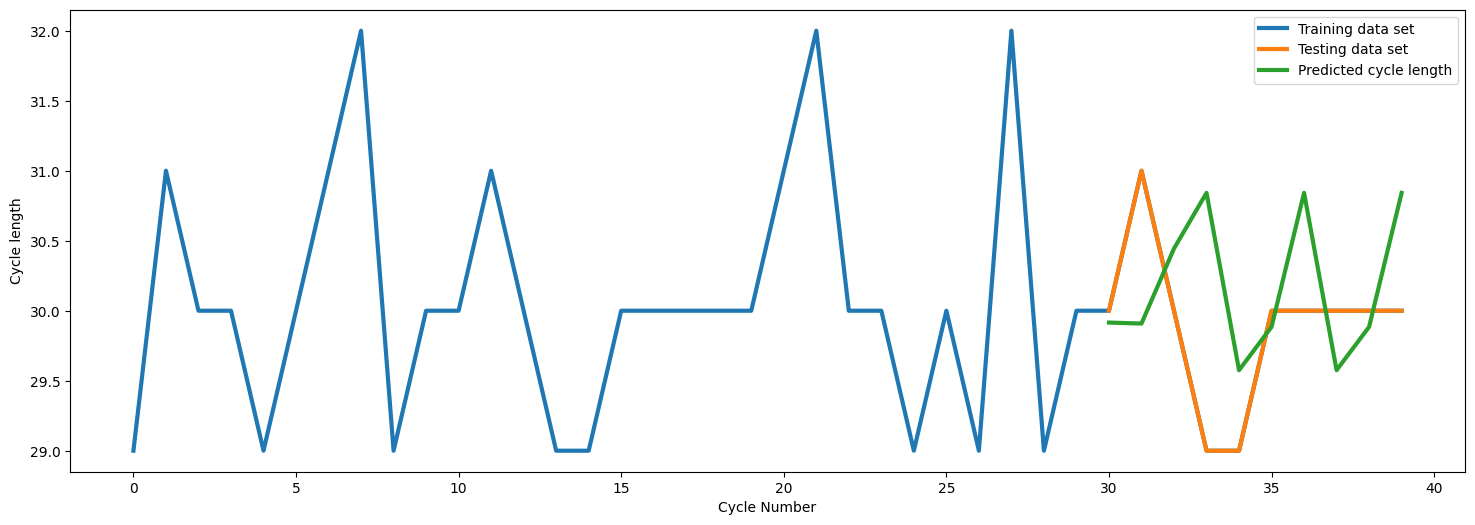

In [49]:
plt.figure(figsize=(18,6))
plt.plot(data,label="Training dataset",linewidth=3)
plt.plot(X_test,label="Testing dataset",linewidth=3)
plt.plot(prediction,label="Predicted cycle length",linewidth=3)
plt.legend(loc = 'best')
plt.xlabel("Cycle Number")
plt.ylabel("Cycle length")
plt.show()

MAE: 0.6375994063839517
RMSE: 0.8211667939819169


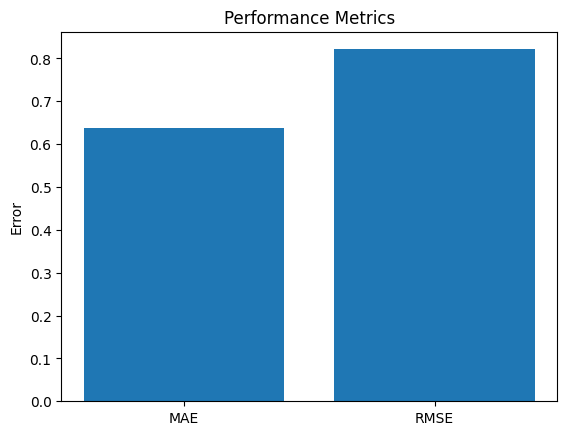

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae = mean_absolute_error(X_test, prediction)
print("MAE:", mae)


rmse = mean_squared_error(X_test, prediction
                          , squared=False)
print("RMSE:", rmse)
plt.figure()
plt.bar(['MAE', 'RMSE'], [mae, rmse])
plt.title('Performance Metrics')
plt.ylabel('Error')
plt.savefig('performance_metrics.png')


In [50]:
X_full = pd.concat([X_train, X_test])
arima_model.fit(X_full)
future_predictions = arima_model.predict(n_periods=10)

future_predictions_df = pd.DataFrame(future_predictions, index=pd.date_range(start=X_test.index[-1], periods=10, freq='D'))
future_predictions_df.columns = ['predicted_Cyclelength']



In [51]:
print(future_predictions)

40    30.129111
41    29.864937
42    30.448338
43    29.975431
44    29.919253
45    30.200045
46    29.975431
47    29.919253
48    30.200045
49    29.975431
dtype: float64


In [52]:
future=future_predictions+X_test

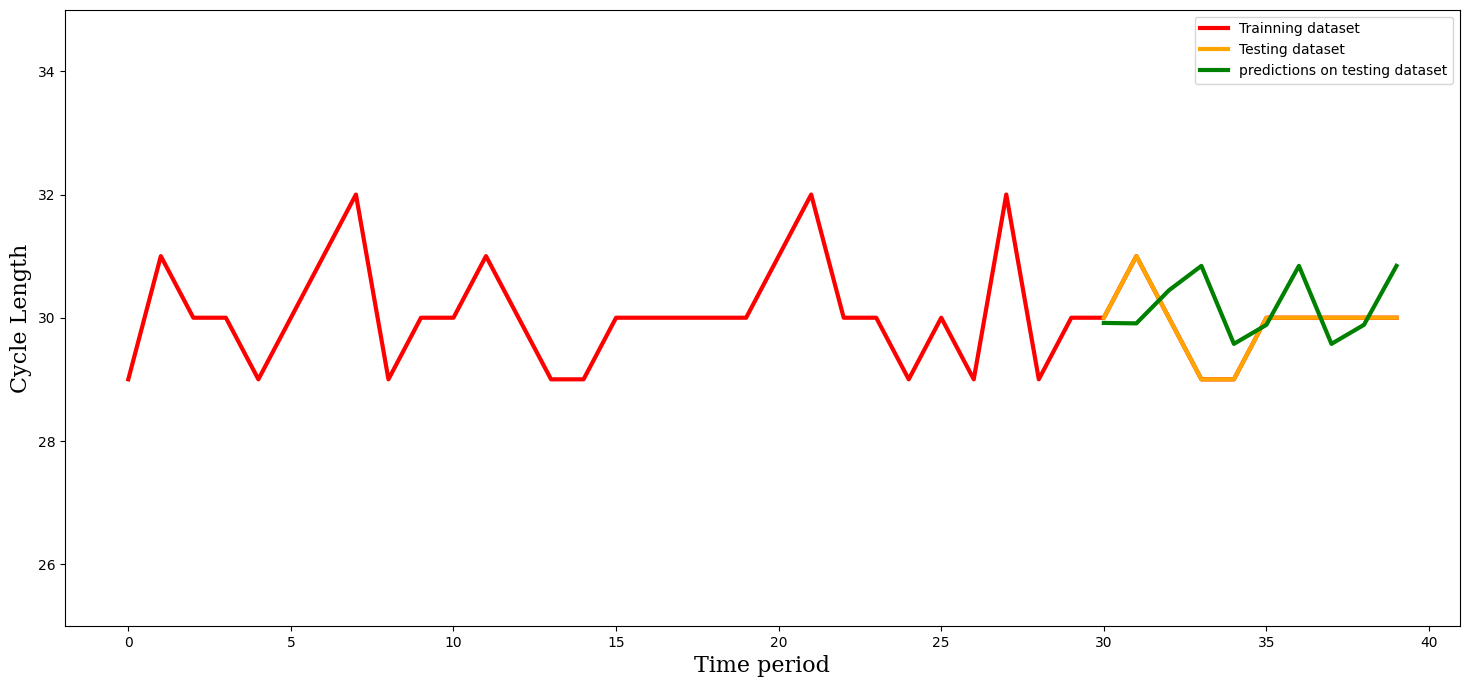

In [53]:
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])

plt.figure(figsize=(18,8))
p=prediction
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.plot(data,label='Trainning dataset',color='red',linewidth=3 )
plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
# Plot the past values and future predictions
#prediction = prediction.drop(prediction.index[0])

plt.plot(prediction,label='predictions on testing dataset',color='green',linewidth=3)
#plt.plot(future, label = 'Predictions of future value')
#plt.plot(future_predictions, label = 'Predictions of  value',color='black',linewidth=3)
plt.ylim(25, 35)
plt.legend(fontsize=14)



plt.legend(loc='best')
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()


NameError: name 'predictions' is not defined

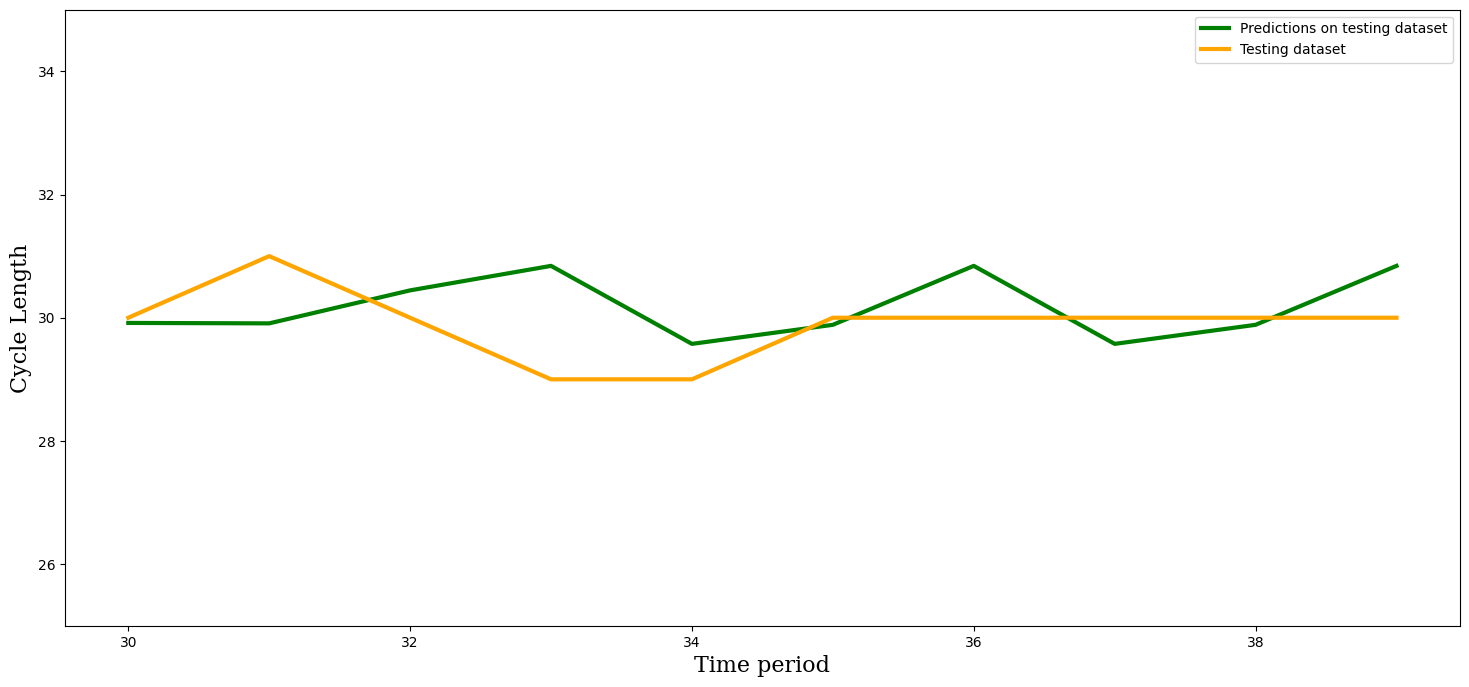

In [54]:
prediction=p
# Concatenate the past values and future predictions
all_prediction = pd.concat([prediction, future_predictions])
font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 16}
plt.figure(figsize=(18,8))
# Plot the past values and future predictions
plt.plot(prediction,label='Predictions on testing dataset',color='green',linewidth=3)
#plt.plot(future_predictions, label = 'Predictions of future value',color='black',linewidth=3)

plt.plot(X_test, label = 'Testing dataset', color='orange',linewidth=3)
plt.legend(loc='best')
plt.ylim(25, 35)
plt.xlabel("Time period", fontdict=font)
plt.ylabel("Cycle Length", fontdict=font)
plt.show()
